In [9]:
#library
from keras.datasets import mnist

In [18]:
#train-test split
(train_images, train_labels) = mnist.load_data()[0]
(test_images, test_labels) = mnist.load_data()[1]

print("shape of train images",train_images.shape)
print("shape of test images",test_images.shape)


shape of train images (60000, 28, 28)
shape of test images (10000, 28, 28)


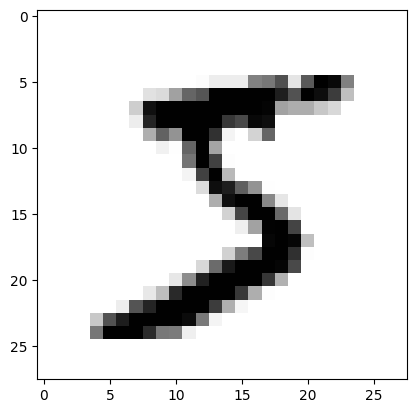

In [11]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap="gray_r") #cmap:color map
plt.show()

##Dataset Düzenleme

In [12]:
print("train images:",train_images.shape[0])
print("test images:",test_images.shape[0])

train images: 60000
test images: 10000


In [13]:
#preparing data
""""ArithmeticError
1. 3d -> 4d numpy array
2. normalization: /255

"""
#3d -> 4d numpy array
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

print("shape of train images",train_images.shape)
print("shape of test images",test_images.shape)

# normalization: /255
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")

train_images /= 255
test_images /= 255

shape of train images (60000, 28, 28, 1)
shape of test images (10000, 28, 28, 1)


In [14]:
input_shape = (28, 28, 1)

In [4]:
#library
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D

#creating network
model = Sequential()

model.add(Conv2D(28, kernel_size=(3,3),input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax")) 


/home/isu-researcher/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
#compiling model
model.compile(optimizer="adam",
              loss ="sparse_categorical_crossentropy",
              metrics =["accuracy"])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4732)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       605,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 607,394 (2.32 MB)

 Trainable params: 607,394 (2.32 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
#fitting model
history = model.fit(
    x = train_images,
    y = train_labels,
    epochs = 10
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8090 - loss: 2.2761
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9264 - loss: 0.2748
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9479 - loss: 0.1868
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9532 - loss: 0.1729
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9572 - loss: 0.1611
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9611 - loss: 0.1450
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9620 - loss: 0.1408
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9667 - loss: 0.1233
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9657 - loss: 0.1287
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9695 - loss: 0.1232


In [23]:
#evaluating model

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:",test_loss)
print("Test Accuracy:",test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9677 - loss: 0.1937
Test Loss: 0.15934966504573822
Test Accuracy: 0.9732999801635742


In [24]:
history_dict = history.history
print("Keys:",history_dict.keys())

Keys: dict_keys(['accuracy', 'loss'])


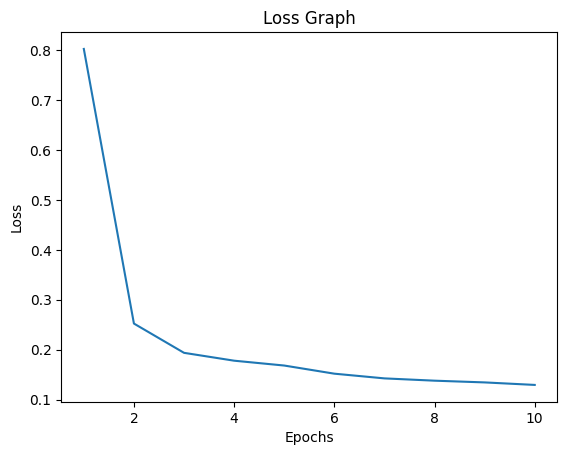

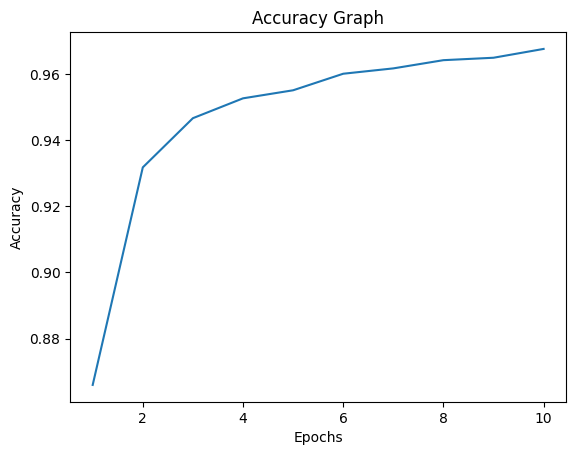

In [28]:
#loss,accuracy graph
import matplotlib.pyplot as plt

epochs = range(1,11)
loss = history_dict["loss"]

plt.plot(epochs, loss)
plt.title("Loss Graph")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

accuracy = history_dict["accuracy"]

plt.plot(epochs, accuracy)
plt.title("Accuracy Graph")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [29]:
#saving model
model.save("mnist_model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Number: 7
Prediction [[0.0000000e+00 2.3414285e-23 1.5243173e-23 2.8073453e-20 4.2591448e-33
  0.0000000e+00 0.0000000e+00 1.0000000e+00 5.4506060e-33 9.5537847e-18]]


<function matplotlib.pyplot.show(close=None, block=None)>

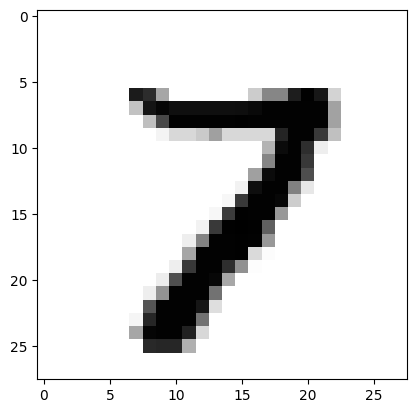

In [35]:
#loading model and prediction
import random
from keras.models import load_model

model = load_model("mnist_model.h5")

i= random.randint(1, 100)

prediction = model.predict(test_images[i].reshape(1,28,28,1),)
print("Predicted Number:",prediction.argmax())
print("Prediction Array",prediction)

plt.imshow(test_images[i].reshape(28,28), cmap="gray_r")
plt.show